IMPORT ALL ESSENTIAL LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow import keras 
import tensorflow as tf
import random
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle 

#ignore warning messages
import warnings
warnings.filterwarnings('ignore') 

#ignore TensorFlow warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

sns.set()

GATHERING THE DATASETS

In [2]:
dataset = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset = dataset[:].values
alphabets = pd.DataFrame(dataset)
print('The dataset consisting of all alphabets:')
print(alphabets)

The dataset consisting of all alphabets:
         0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0 

In [3]:
digit_test = pd.read_csv('mnist_test.csv').astype('str')
digit_train = pd.read_csv('mnist_train.csv').astype('str')
digits = pd.concat([digit_train, digit_test], ignore_index=True)
digits = digits[:].values
digits = pd.DataFrame(digits)

In [4]:
#Change the labels of all digits for merging them with alphabets
digits[0] = digits[0].replace({"0": "26", "1": "27", "2": "28", "3": "29", "4": "30", "5": "31", "6": "32", "7": "33", "8": "34", "9": "35"})
digits = digits.astype('float32')
print("The dataset consisting of all digits:")
print(digits)

The dataset consisting of all digits:
        0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0      31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      27.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      35.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995  28.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69996  29.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69997  30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69998  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69999  32.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

 

In [5]:
#Print the shapes of alphabets and digits datsets respectively
print(alphabets.shape)
print(digits.shape)

(372450, 785)
(70000, 785)


In [6]:
#Form one big dataset combining both alphabets and digits
alphanum = pd.concat([alphabets, digits], ignore_index=True)
print("The dataset consisting of all alphanumerics:")
print(alphanum)

The dataset consisting of all alphanumerics:
         0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
442445  28.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
442446  29.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
442447  30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
442448  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
442449  32.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  

In [7]:
#Dropping the labels into our target variable y
X = alphanum.drop(0,axis = 1)
y = alphanum[0]

In [8]:
print("shape:",X.shape)
print("columns count:",len(X.iloc[1]))
#All images are of size 28x28
print("784 = 28X28")
pd.set_option('display.max_columns', None)
X.head()

shape: (442450, 784)
columns count: 784
784 = 28X28


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,177.0,255.0,188.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,255.0,255.0,255.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,55.0,242.0,255.0,246.0,255.0,249.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,255.0,255.0,192.0,112.0,255.0,255.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

VISUALIZATION OF DATASET

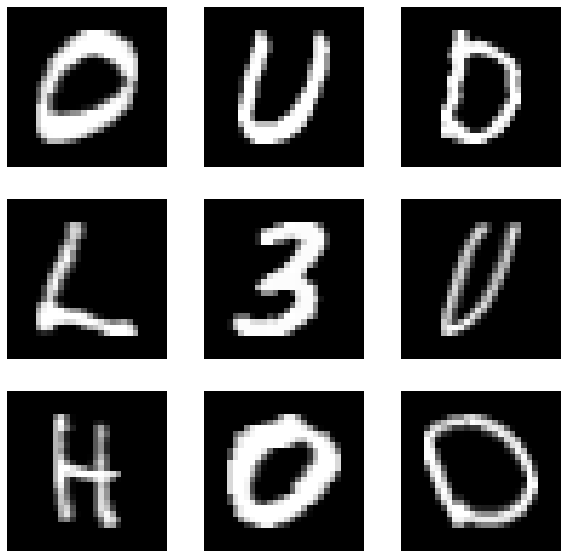

In [9]:
plt.figure(figsize=(10,10))
X_shuffle = shuffle(X)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28), cmap='gray'); 
    plt.axis('off')
plt.show()

Amount of each label


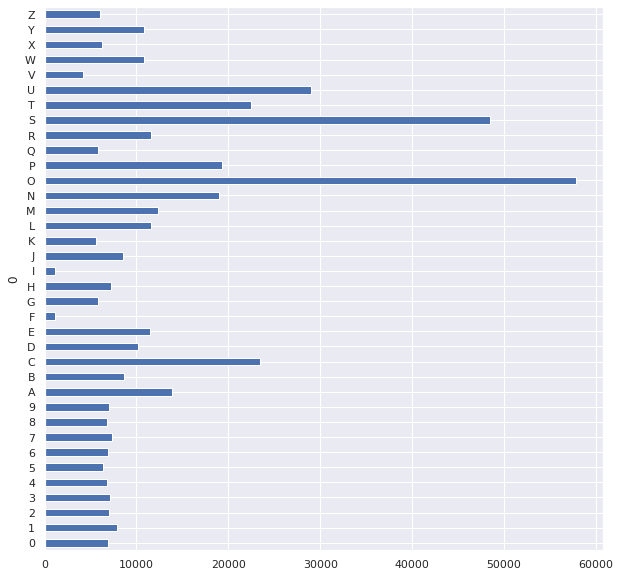

In [10]:
print("Amount of each label")
# Change label to alphabets
alpha_class = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z',26: "0", 27: "1", 28: "2", 29: "3", 30: "4", 31: "5", 32: "6", 33: "7", 34: "8", 35: "9"} 
alpha_num = alphanum.copy()
alphanum[0] = alphanum[0].map(alpha_class)
label_size = alphanum.groupby(0).size()
#Plot bargraph showing amount of each classes/labels  
label_size.plot.barh(figsize=(10,10))
plt.show()

DATA PREPROCESSING

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [12]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((353960, 784), (353960,)), ((88490, 784), (88490,)))

In [13]:
X_train = X_train.values.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.values.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Saving y_true values before one hot encoding
y_true = y_test
y_true = y_true.astype('int32')
# one hot encoding the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

BUILDING THE CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
model = models.Sequential()

# CONVOLUTIONAL LAYER 1 WITH 32 FILTERS & KERNEL SIZE 5X5

model.add(layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER 1 WITH POOLING SIZE 2X2

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER 2 WITH 32 FILTERS & KERNEL SIZE 5X5

model.add(layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER 2 WITH POOLING SIZE 2X2

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# DROPOUT LAYER 1

model.add(layers.Dropout(0.1))

# FLATTENING LAYER TO 2D SHAPE

model.add(layers.Flatten())

# DENSE LAYER 1

model.add(layers.Dense(128, activation='relu'))

# DENSE LAYER 2

model.add(layers.Dense(64, activation='relu'))

# FINAL OUTPUT LAYER

model.add(layers.Dense(36, activation='softmax'))


# PRINTING MODEL SUMMARY

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0

COMPILING AND TRAINING THE CNN

In [15]:
checkpointer = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(X_train, y_train, epochs=15, callbacks=[checkpointer], validation_data=(X_test, y_test))

Epoch 1/10
11062/11062 [==============================] - ETA: 0s - loss: 0.3224 - accuracy: 0.9117
Epoch 00001: val_loss improved from inf to 0.16320, saving model to model.h5
11062/11062 [==============================] - 61s 5ms/step - loss: 0.3224 - accuracy: 0.9117 - val_loss: 0.1632 - val_accuracy: 0.9524
Epoch 2/10
11062/11062 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9557
Epoch 00002: val_loss improved from 0.16320 to 0.13018, saving model to model.h5
11062/11062 [==============================] - 58s 5ms/step - loss: 0.1573 - accuracy: 0.9557 - val_loss: 0.1302 - val_accuracy: 0.9637
Epoch 3/10
11055/11062 [============================>.] - ETA: 0s - loss: 0.1383 - accuracy: 0.9622
Epoch 00003: val_loss improved from 0.13018 to 0.11641, saving model to model.h5
11062/11062 [==============================] - 61s 6ms/step - loss: 0.1383 - accuracy: 0.9622 - val_loss: 0.1164 - val_accuracy: 0.9695
Epoch 4/10
11061/11062 [============================>

EVALUATION OF THE MODEL

In [16]:
#History has the following keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

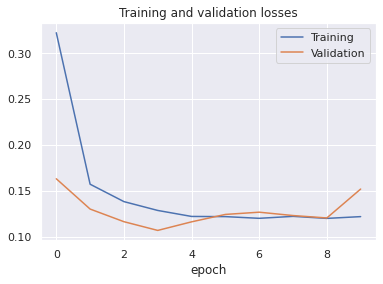

In [17]:
# Plot graph between training and validation/test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')
plt.show()

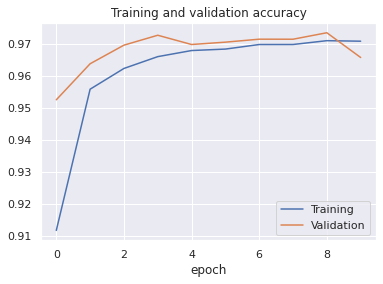

In [18]:
# Plot graph between training and validation/test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')
plt.show()

In [19]:
#Get test accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy and CNN Score : ", test_acc)

Test Set Loss :  0.15199176967144012
Test Set Accuracy and CNN Score :  0.9656458497047424


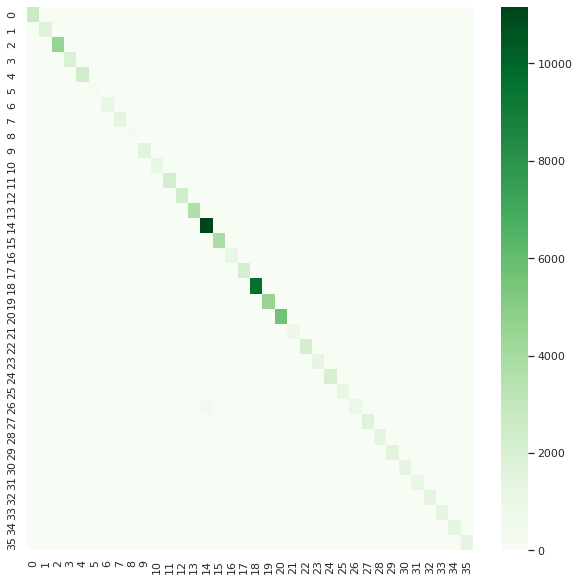

In [20]:
#Plot confusion matrix
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
confusion_matrix = confusion_matrix(y_true, y_pred)
plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix, cmap='Greens')
plt.show()

PREDICTIONS ON USED DATA

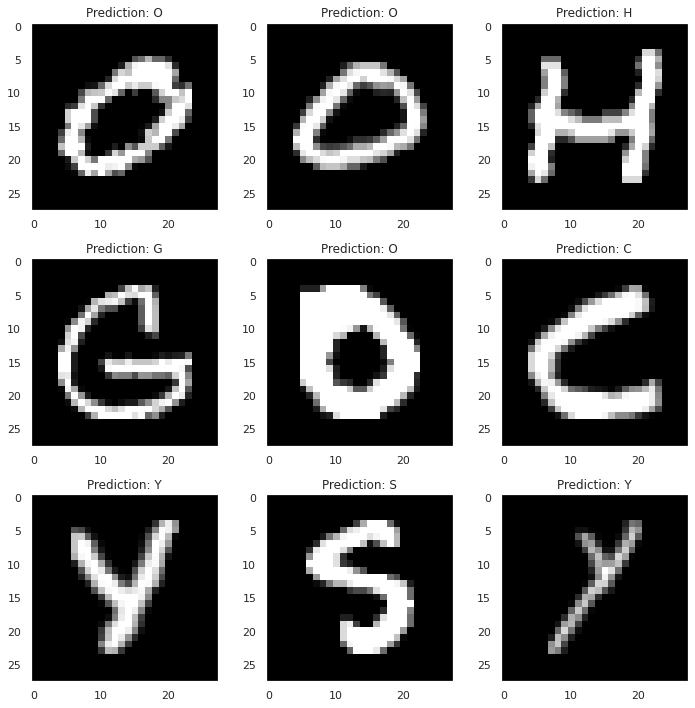

In [21]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
    g = random.randint(0, len(X_test))
    img = np.reshape(X_test[g], (28,28))
    ax.imshow(img, cmap="gray")
    pred = alpha_class[np.argmax(y_test[g])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
fig.tight_layout()

PREDICTIONS ON NEW DATA

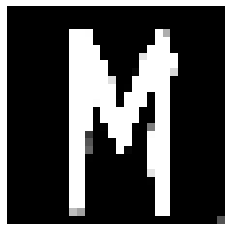

M


In [22]:
#As the model has been trained on a dataset where the background is black (0) and foreground is white (255); 
#the model expects to be tested on a similar image. So while creating the image use a white background and a black pen.
#The model will invert the image and then use it for testing.       

#Loading the best weights (minimum validation loss)
model.load_weights('model.h5')
image = 'M.jpeg'
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = 255 - image
image = image.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

print(alpha_class[np.argmax(model.predict(image.reshape(1, 28, 28, 1)))])